In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path_ciblage = 'Data/base_telecom_2023_03.txt'
pd.set_option("display.max_columns", None)
df = pd.read_csv(file_path_ciblage, sep=';', encoding='UTF-8')
df.head()

,id_client,date_naissance,sexe,csp,code_postal,taille_ville,type_ville,revenu_moyen_ville,date_activation,enseigne,mode_paiement,duree_offre_init,duree_offre,nb_migrations,flag_migration_hausse,flag_migration_baisse,nb_services,flag_personnalisation_repondeur,flag_telechargement_sonnerie,telephone_init,telephone,date_fin_engagement,nb_reengagements,date_dernier_reengagement,situation_impayes,vol_appels_m6,vol_appels_m5,vol_appels_m4,vol_appels_m3,vol_appels_m2,vol_appels_m1,flag_appels_vers_international,flag_appels_depuis_international,flag_appels_numeros_speciaux,nb_sms_m6,nb_sms_m5,nb_sms_m4,nb_sms_m3,nb_sms_m2,nb_sms_m1,segment
0,ID_671314953208,18/04/1967,Féminin,Autre,59130,28200.0,Urbaine,19322.0,04/07/2019,Internet,Virement,4.0,4.0,2,1,1,4,0,0,Bas de gamme,Milieu de gamme,18/09/2024,1,18/09/2022,A été en impayé,10256,10014,10455,8893,10668,9080,0,0,1,12,11,12,7.0,13,8,A
1,ID_306233471262,12/02/2001,Féminin,Etudiant,28800,4285.0,Rurale,12153.0,24/11/2021,Internet,Virement,3.0,2.0,1,0,1,5,0,0,Haut de gamme,Bas de gamme,24/11/2023,0,NaN,A été en impayé,11774,11143,11057,14477,12061,13240,0,0,1,52,50,49,61.0,53,57,B
2,ID_326072137722,07/02/1950,Masculin,Autre,17750,1587.0,Rurale,12245.0,12/01/2019,Grande distribution,Virement,3.0,2.0,1,0,1,3,0,0,Bas de gamme,Milieu de gamme,06/08/2023,2,06/08/2022,Aucun impayé,6666,6737,5930,6070,6086,5732,0,0,0,10,10,7,7.0,6,4,B
3,ID_214108444105,07/08/1970,Masculin,Employé,14400,417.0,Péri-urbaine,12427.0,25/11/2022,Grande distribution,Virement,1.0,1.0,0,0,0,0,0,1,Haut de gamme,Haut de gamme,27/05/2023,0,NaN,Aucun impayé,3893,3345,4148,4003,3591,4282,0,0,1,0,0,0,0.0,0,0,C
4,ID_999816307658,21/12/1995,Masculin,Fonctionnaire,34110,3054.0,Péri-urbaine,13772.0,22/04/2022,Internet,Virement,4.0,4.0,0,0,0,4,0,1,Haut de gamme,Bas de gamme,22/04/2023,0,NaN,Aucun impayé,19454,20177,20276,20914,23525,18688,0,0,0,368,375,376,383.0,409,360,A


## Etude des observations manquantes par variables

In [3]:
df.describe()

,taille_ville,revenu_moyen_ville,duree_offre_init,duree_offre,nb_migrations,flag_migration_hausse,flag_migration_baisse,nb_services,flag_personnalisation_repondeur,flag_telechargement_sonnerie,nb_reengagements,vol_appels_m6,vol_appels_m5,vol_appels_m4,vol_appels_m3,vol_appels_m2,vol_appels_m1,flag_appels_vers_international,flag_appels_depuis_international,flag_appels_numeros_speciaux,nb_sms_m6,nb_sms_m5,nb_sms_m4,nb_sms_m3,nb_sms_m2,nb_sms_m1
count,20799.000000,21596.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22528.000000,22332.000000,22528.000000,22528.000000
mean,58418.775133,15751.805056,3.190430,3.245228,1.484331,0.357022,0.508212,2.948065,0.195179,0.140847,0.656117,17849.084206,17872.488237,17875.908691,17931.977006,17902.492188,17874.073908,0.260076,0.166371,0.575328,101.727051,101.727583,101.518865,101.598782,101.500355,101.241788
std,78601.886989,4948.783092,1.334549,2.085953,1.448613,0.479132,0.499944,1.833424,0.396347,0.347871,0.704762,10478.194828,10482.355042,10541.687390,10586.270231,10569.763684,10573.091093,0.438686,0.372421,0.494304,132.754593,132.959440,132.895190,133.277487,133.102992,133.151444
min,41.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6362.000000,12504.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9508.750000,9570.750000,9537.500000,9525.250000,9495.750000,9421.000000,0.000000,0.000000,0.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000
50%,25892.000000,14160.000000,3.000000,3.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,16406.000000,16515.000000,16429.500000,16475.000000,16460.000000,16426.000000,0.000000,0.000000,1.000000,30.000000,30.000000,31.000000,31.000000,32.000000,32.000000
75%,73002.000000,18051.000000,4.000000,4.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,25358.250000,25366.000000,25270.500000,25442.000000,25357.000000,25366.000000,1.000000,0.000000,1.000000,135.000000,136.000000,135.000000,135.000000,135.000000,134.000000
max,390401.000000,57257.000000,10.000000,10.000000,12.000000,1.000000,1.000000,13.000000,1.000000,1.000000,4.000000,45681.000000,45793.000000,46277.000000,46128.000000,46616.000000,47053.000000,1.000000,1.000000,1.000000,531.000000,531.000000,535.000000,532.000000,535.000000,537.000000


In [4]:
df.isna().sum()

id_client                               0
date_naissance                         15
sexe                                    4
csp                                     0
code_postal                             0
taille_ville                         1729
type_ville                            932
revenu_moyen_ville                    932
date_activation                         0
enseigne                                0
mode_paiement                           0
duree_offre_init                        0
duree_offre                             0
nb_migrations                           0
flag_migration_hausse                   0
flag_migration_baisse                   0
nb_services                             0
flag_personnalisation_repondeur         0
flag_telechargement_sonnerie            0
telephone_init                          0
telephone                               0
date_fin_engagement                   289
nb_reengagements                        0
date_dernier_reengagement         

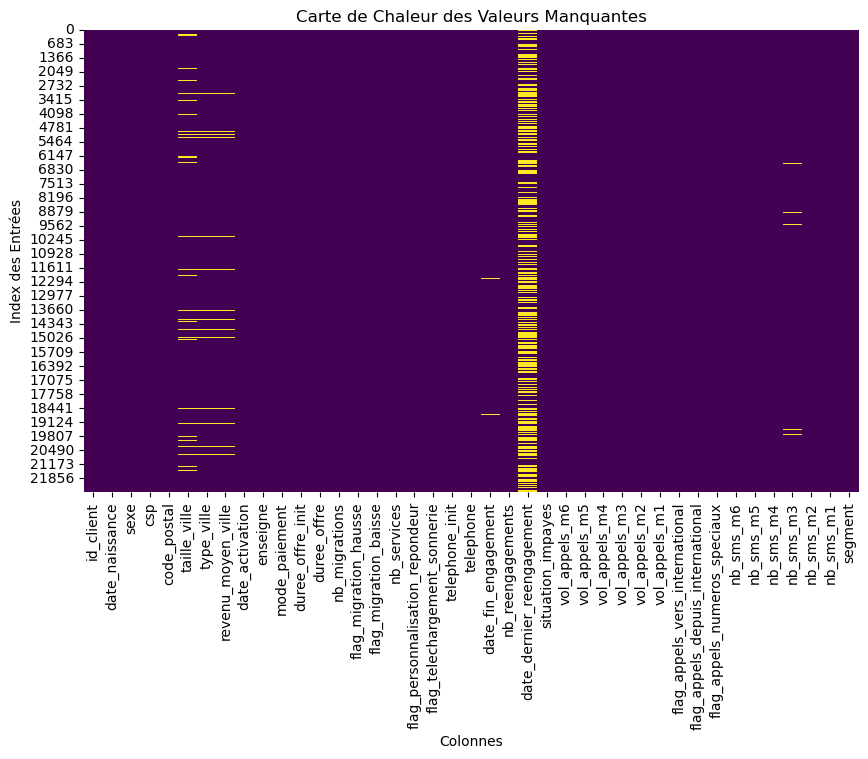

In [5]:
# Vérification visuelle des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de Chaleur des Valeurs Manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Index des Entrées')
plt.show()

In [34]:
#Pourcentage de valeurs manquantes par variables
def pct_miss_var(data):
    return data.isnull().mean() * 100

pct_missing = pct_miss_var(df)
print(pct_missing)


id_client                            0.000000
date_naissance                       0.000000
sexe                                 0.017756
csp                                  0.000000
revenu_moyen_ville                   4.137074
date_activation                      0.000000
enseigne                             0.000000
mode_paiement                        0.000000
duree_offre_init                     0.000000
duree_offre                          0.000000
nb_migrations                        0.000000
flag_migration_hausse                0.000000
flag_migration_baisse                0.000000
nb_services                          0.000000
flag_personnalisation_repondeur      0.000000
flag_telechargement_sonnerie         0.000000
telephone_init                       0.000000
telephone                            0.000000
date_fin_engagement                  1.282848
nb_reengagements                     0.000000
date_dernier_reengagement           47.416548
situation_impayes                 

### Traitement des valeurs manquantes

#### Supression des variables qui ne nous apportent pas d'information pertinente

In [50]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['code_postal', 'taille_ville','type_ville','revenu_moyen_ville']

# Supprimer les colonnes spécifiées
df = df.drop(colonnes_a_supprimer, axis=1)


In [43]:
# Calculer le mode de la colonne de date de naissance
mode_date_de_naissance = df['date_naissance'].mode()[0]

# Remplacer les valeurs manquantes par le mode de la date de naissance
df['date_naissance'] = df['date_naissance'].fillna(mode_date_de_naissance)

# Calculer le mode de la colonne 'sexe'
mode_date_fin_engagement = df['date_fin_engagement'].mode()[0]

# Remplacer les valeurs manquantes par le mode de la colonne 'sexe'
df['date_fin_engagement'] = df['date_fin_engagement'].fillna(mode_sexe)

# Calculer le mode de la colonne 'sexe'
mode_sexe = df['sexe'].mode()[0]

# Remplacer les valeurs manquantes par le mode de la colonne 'sexe'
df['sexe'] = df['sexe'].fillna(mode_sexe)


#### Gestion des engagements et des reengagements

In [ ]:
# Convertir les colonnes en objets datetime
df['date_dernier_reengagement'] = pd.to_datetime(df['date_dernier_reengagement'], format='%d/%m/%Y')
df['date_activation'] = pd.to_datetime(df['date_activation'], format='%d/%m/%Y')

# Calcul de la différence entre les deux colonnes
df['Reengament_type'] = df['date_dernier_reengagement'] - df['date_activation']

In [ ]:
df['date_fin_engagement'] = pd.to_datetime(df['date_fin_engagement'], format='%d/%m/%Y')
df['Dead_line_engagement'] = df['date_fin_engagement'] - df['date_dernier_reengagement']

In [10]:
# Création variable durée engagement avec la date de fin engagement et date de d'activiation

In [11]:
 # Convertir la date de référence en objet datetime
date_reference = pd.to_datetime('31/03/2023', format='%d/%m/%Y')

# Calcul de l'ancienneté en soustrayant la date de référence de chaque date dans la colonne
df['anciennete'] = date_reference-df['date_activation']

In [12]:
df['duree_engagement'] = date_reference-df['date_dernier_reengagement']
df['Variation_offre_ini'] = df['duree_offre'] - df['duree_offre_init']

In [ ]:
engage=df[["date_fin_engagement","date_dernier_reengagement","date_activation","Dead_line_engagement","Reengament_type","anciennete"]]
engage

#### Changement de téléphone 

In [14]:
def evaluer_changement(row):
    if row['telephone'] == 'Haut de gamme' and row['telephone_init'] == 'Bas de gamme':
        return 1
    elif row['telephone'] == 'Haut de gamme' and row['telephone_init'] == 'Milieu de gamme':
        return 1
    elif row['telephone'] == 'Milieu de gamme' and row['telephone_init'] == 'Bas de gamme':
        return 1
    else:
        return 0
    
def evaluer_down(row):
    if row['telephone'] == 'Bas de gamme' and row['telephone_init'] == 'Milieu de gamme':
        return 1
    elif row['telephone'] == 'Bas de gamme' and row['telephone_init'] == 'Haut de gamme':
        return 1
    elif row['telephone'] == 'Milieu de gamme' and row['telephone_init'] == 'Haut de gamme':
        return 1
    else:
        return 0
    
def Identif_tel(row):
    if row['telephone_init'] == 'Carte SIM seule':
        return 1
    else:
        return 0
    
# Appliquer la fonction pour créer une nouvelle colonne 'changement_telephone'
df['Upgrade_tel'] = df.apply(evaluer_changement, axis=1)
df['Downgrade_tel'] = df.apply(evaluer_down, axis=1)
df['Identif_tel'] = df.apply(Identif_tel, axis=1)

#### Création de volumes d'appels

In [15]:

# Calcul de la moyenne mobile pour chaque client
df['Moyenne_mobile'] = df[['vol_appels_m1', 'vol_appels_m2', 'vol_appels_m3',
                          'vol_appels_m4','vol_appels_m5','vol_appels_m6']].mean(axis=1)

# Calcul de la variabilité pour chaque client
df['Variabilité_vol'] = np.sqrt(((df['vol_appels_m1'] - df['Moyenne_mobile'])**2 +
                             (df['vol_appels_m2'] - df['Moyenne_mobile'])**2 +
                             (df['vol_appels_m3'] - df['Moyenne_mobile'])**2 +
                             (df['vol_appels_m4'] - df['Moyenne_mobile'])**2 +
                             (df['vol_appels_m5'] - df['Moyenne_mobile'])**2 +
                             (df['vol_appels_m6'] - df['Moyenne_mobile'])**2) / 6)


# Calcul de la moyenne mobile pour chaque client
df['Moyenne_sms'] = df[['nb_sms_m1', 'nb_sms_m2', 'nb_sms_m3',
                          'nb_sms_m4','nb_sms_m5','nb_sms_m6']].mean(axis=1)

# Calcul de la variabilité pour chaque client
df['Variabilité_sms'] = np.sqrt(((df['nb_sms_m1'] - df['Moyenne_sms'])**2 +
                             (df['nb_sms_m2'] - df['Moyenne_sms'])**2 +
                             (df['nb_sms_m3'] - df['Moyenne_sms'])**2 +
                             (df['nb_sms_m4'] - df['Moyenne_sms'])**2 +
                             (df['nb_sms_m5'] - df['Moyenne_sms'])**2 +
                             (df['nb_sms_m6'] - df['Moyenne_sms'])**2) / 6)


#### Personnalisation

In [17]:
# Création de la colonne indiquant la grande personnalisation de l'offre
df['Personnalisation'] = ((df['flag_personnalisation_repondeur'] == 1) & (df['flag_telechargement_sonnerie'] == 1)).astype(int)
df['Internationnal'] = ((df['flag_appels_vers_international'] == 1) & (df['flag_appels_depuis_international'] == 1)).astype(int)


### Création de la colonne age

In [18]:
# Conversion de la colonne de date de naissance en type datetime
df['date_naissance'] = pd.to_datetime(df['date_naissance'], format='%d/%m/%Y')

# Définition de la date de référence
date_reference = pd.to_datetime('31/03/2023', format='%d/%m/%Y')

# Calcul de l'âge pour chaque client
df['age'] = (date_reference - df['date_naissance']).astype('<m8[Y]')

## Opération sur la base 2022

In [77]:
file_path_ciblage = 'Data/base_telecom_2023_03.txt'
pd.set_option("display.max_columns", None)
df_2022 = pd.read_csv(file_path_ciblage, sep=';', encoding='UTF-8')
df_2022.head()

# Supprimer les colonnes spécifiées
df_2022 = df_2022.drop(colonnes_a_supprimer, axis=1)

# Calculer le mode de la colonne de date de naissance
mode_date_de_naissance = df_2022['date_naissance'].mode()[0]
# Remplacer les valeurs manquantes par le mode de la date de naissance
df_2022['date_naissance'] = df_2022['date_naissance'].fillna(mode_date_de_naissance)

# Calculer le mode de la colonne 'sexe'
mode_date_fin_engagement = df_2022['date_fin_engagement'].mode()[0]
# Remplacer les valeurs manquantes par le mode de la colonne 'sexe'
df_2022['date_fin_engagement'] = df_2022['date_fin_engagement'].fillna(mode_date_fin_engagement)

# Calculer le mode de la colonne 'sexe'
mode_sexe = df_2022['sexe'].mode()[0]
# Remplacer les valeurs manquantes par le mode de la colonne 'sexe'
df_2022['sexe'] = df_2022['sexe'].fillna(mode_sexe)

# Calculer le mode de la colonne 'nb_sms_m3'
mean_nb_sms_m3 = df_2022['nb_sms_m3'].mean()
# Remplacer les valeurs manquantes par le mode de la colonne 'sexe'
df_2022['nb_sms_m3'] = df_2022['nb_sms_m3'].fillna(mean_nb_sms_m3)

# Convertir les colonnes en objets datetime
df_2022['date_dernier_reengagement'] = pd.to_datetime(df_2022['date_dernier_reengagement'], format='%d/%m/%Y')
df_2022['date_activation'] = pd.to_datetime(df_2022['date_activation'], format='%d/%m/%Y')

# Calcul de la différence entre les deux colonnes
df_2022['Reengament_type'] = df_2022['date_dernier_reengagement'] - df_2022['date_activation']

df_2022['date_fin_engagement'] = pd.to_datetime(df_2022['date_fin_engagement'], format='%d/%m/%Y')
df_2022['Dead_line_engagement'] = df_2022['date_fin_engagement'] - df_2022['date_dernier_reengagement']

 # Convertir la date de référence en objet datetime
date_reference_2022 = pd.to_datetime('31/03/2023', format='%d/%m/%Y')

# Calcul de l'ancienneté en soustrayant la date de référence de chaque date dans la colonne
df_2022['anciennete'] = date_reference-df_2022['date_activation']

df_2022['duree_engagement'] = date_reference-df_2022['date_dernier_reengagement']
df_2022['Variation_offre_ini'] = df_2022['duree_offre'] - df_2022['duree_offre_init']

# Appliquer la fonction pour créer une nouvelle colonne 'changement_telephone'
df_2022['Upgrade_tel'] = df_2022.apply(evaluer_changement, axis=1)
df_2022['Downgrade_tel'] = df_2022.apply(evaluer_down, axis=1)
df_2022['Identif_tel'] = df_2022.apply(Identif_tel, axis=1)



# Calcul de la moyenne mobile pour chaque client
df_2022['Moyenne_mobile'] = df_2022[['vol_appels_m1', 'vol_appels_m2', 'vol_appels_m3',
                          'vol_appels_m4','vol_appels_m5','vol_appels_m6']].mean(axis=1)

# Calcul de la variabilité pour chaque client
df_2022['Variabilité_vol'] = np.sqrt(((df_2022['vol_appels_m1'] - df_2022['Moyenne_mobile'])**2 +
                             (df_2022['vol_appels_m2'] - df_2022['Moyenne_mobile'])**2 +
                             (df_2022['vol_appels_m3'] - df_2022['Moyenne_mobile'])**2 +
                             (df_2022['vol_appels_m4'] - df_2022['Moyenne_mobile'])**2 +
                             (df_2022['vol_appels_m5'] - df_2022['Moyenne_mobile'])**2 +
                             (df_2022['vol_appels_m6'] - df_2022['Moyenne_mobile'])**2) / 6)


# Calcul de la moyenne mobile pour chaque client
df_2022['Moyenne_sms'] = df_2022[['nb_sms_m1', 'nb_sms_m2', 'nb_sms_m3',
                          'nb_sms_m4','nb_sms_m5','nb_sms_m6']].mean(axis=1)

# Calcul de la variabilité pour chaque client
df_2022['Variabilité_sms'] = np.sqrt(((df_2022['nb_sms_m1'] - df_2022['Moyenne_sms'])**2 +
                             (df_2022['nb_sms_m2'] - df_2022['Moyenne_sms'])**2 +
                             (df_2022['nb_sms_m3'] - df_2022['Moyenne_sms'])**2 +
                             (df_2022['nb_sms_m4'] - df_2022['Moyenne_sms'])**2 +
                             (df_2022['nb_sms_m5'] - df_2022['Moyenne_sms'])**2 +
                             (df_2022['nb_sms_m6'] - df_2022['Moyenne_sms'])**2) / 6)

# Création de la colonne indiquant la grande personnalisation de l'offre
df_2022['Personnalisation'] = ((df_2022['flag_personnalisation_repondeur'] == 1) & (df_2022['flag_telechargement_sonnerie'] == 1)).astype(int)
df_2022['Internationnal'] = ((df_2022['flag_appels_vers_international'] == 1) & (df_2022['flag_appels_depuis_international'] == 1)).astype(int)


# Conversion de la colonne de date de naissance en type datetime
df_2022['date_naissance'] = pd.to_datetime(df_2022['date_naissance'], format='%d/%m/%Y')

# Calcul de l'âge pour chaque client
df_2022['age'] = (date_reference_2022 - df_2022['date_naissance']).astype('<m8[Y]')

In [78]:
df_2022.to_excel('base_telecom_2023.xlsx', index=False)

In [47]:
df_2022.head()

,id_client,flag_resiliation,date_naissance,sexe,csp,revenu_moyen_ville,date_activation,enseigne,mode_paiement,duree_offre_init,duree_offre,nb_migrations,flag_migration_hausse,flag_migration_baisse,nb_services,flag_personnalisation_repondeur,flag_telechargement_sonnerie,telephone_init,telephone,date_fin_engagement,nb_reengagements,date_dernier_reengagement,situation_impayes,vol_appels_m6,vol_appels_m5,vol_appels_m4,vol_appels_m3,vol_appels_m2,vol_appels_m1,flag_appels_vers_international,flag_appels_depuis_international,flag_appels_numeros_speciaux,nb_sms_m6,nb_sms_m5,nb_sms_m4,nb_sms_m3,nb_sms_m2,nb_sms_m1,segment,Reengament_type,Dead_line_engagement,anciennete,duree_engagement,Variation_offre_ini,Upgrade_tel,Downgrade_tel,Identif_tel,Moyenne_mobile,Variabilité_vol,Moyenne_sms,Variabilité_sms,Personnalisation,Internationnal,age
0,ID_200530279381,0,1964-08-08,Féminin,Sans emploi,13342.0,2018-12-05,Internet,Virement,4.0,8.0,1,1,0,1,0,0,Milieu de gamme,Milieu de gamme,2022-09-07,1,2021-09-07,Aucun impayé,40404,39438,37781,40136,42205,39144,0,0,0,142,137,130,139.0,146,133,A,1007 days,365 days,1577 days,570 days,4.0,0,0,0,39851.333333,1346.827589,137.833333,5.335937,0,0,58.0
1,ID_338394942292,0,1998-06-30,Féminin,Employé,17243.0,2021-12-21,Grande distribution,Virement,1.0,1.0,0,0,0,0,0,0,Carte SIM seule,Haut de gamme,2022-12-21,0,NaT,Aucun impayé,20875,19396,21062,20981,20680,20051,0,0,1,98,94,100,100.0,100,99,A,NaT,NaT,465 days,NaT,0.0,0,0,1,20507.500000,597.258947,98.500000,2.140872,0,0,24.0
2,ID_759265072159,0,1987-12-15,Masculin,Employé,13417.0,2018-12-17,Internet,Virement,4.0,4.0,2,1,1,2,0,0,Haut de gamme,Haut de gamme,2024-11-27,1,2022-11-27,A été en impayé,15313,12973,13890,15870,14975,15652,1,0,1,125,101,110,129.0,119,125,A,1441 days,731 days,1565 days,124 days,0.0,0,0,0,14778.833333,1026.964689,118.166667,9.770989,0,0,35.0
3,ID_567023742370,0,1974-09-17,Masculin,Commerçant,13951.0,2022-10-23,Internet,Virement,4.0,4.0,0,0,0,3,1,0,Carte SIM seule,Haut de gamme,2023-10-23,0,NaT,A été en impayé,23455,23105,21945,23164,24957,23524,0,0,0,206,203,190,205.0,228,211,A,NaT,NaT,159 days,NaT,0.0,0,0,1,23358.333333,884.305691,207.166667,11.305112,0,0,48.0
4,ID_679011404039,1,1974-06-06,Féminin,Fonctionnaire,13718.0,2021-01-11,Boutique,Virement,4.0,1.0,4,0,1,2,0,0,Carte SIM seule,Milieu de gamme,2023-04-15,0,NaT,Aucun impayé,6765,5279,6124,6545,5498,5729,0,0,0,1,1,1,1.0,1,1,C,NaT,NaT,809 days,NaT,-3.0,0,0,1,5990.000000,538.874135,1.000000,0.000000,0,0,48.0


In [57]:
pct_missing = pct_miss_var(df_2022)
print(pct_missing)

id_client                            0.000000
flag_resiliation                     0.000000
date_naissance                       0.000000
sexe                                 0.000000
csp                                  0.000000
date_activation                      0.000000
enseigne                             0.000000
mode_paiement                        0.000000
duree_offre_init                     0.000000
duree_offre                          0.000000
nb_migrations                        0.000000
flag_migration_hausse                0.000000
flag_migration_baisse                0.000000
nb_services                          0.000000
flag_personnalisation_repondeur      0.000000
flag_telechargement_sonnerie         0.000000
telephone_init                       0.000000
telephone                            0.000000
date_fin_engagement                  0.000000
nb_reengagements                     0.000000
date_dernier_reengagement           48.123695
situation_impayes                 

## Echantillonnage

In [71]:
from sklearn.model_selection import train_test_split

# Définition de la graine aléatoire pour la reproductibilité
random_state = 123

# Echantillonnage stratifié sur la variable cible
# - apprentissage : 70%
# - validation 30%
apprentissage_1, validation_1 = train_test_split(df_2022, 
                                                 test_size=0.3, 
                                                 stratify=df_2022['flag_resiliation'], 
                                                 random_state=random_state)

# Vérification que la proportion de résiliés est la même dans chaque base
print(apprentissage_1['flag_resiliation'].value_counts(normalize=True).round(2))
print(validation_1['flag_resiliation'].value_counts(normalize=True).round(2))


0    0.82
1    0.18
Name: flag_resiliation, dtype: float64
0    0.82
1    0.18
Name: flag_resiliation, dtype: float64


In [69]:
apprentissage_1

,id_client,flag_resiliation,date_naissance,sexe,csp,revenu_moyen_ville,date_activation,enseigne,mode_paiement,duree_offre_init,duree_offre,nb_migrations,flag_migration_hausse,flag_migration_baisse,nb_services,flag_personnalisation_repondeur,flag_telechargement_sonnerie,telephone_init,telephone,date_fin_engagement,nb_reengagements,date_dernier_reengagement,situation_impayes,vol_appels_m6,vol_appels_m5,vol_appels_m4,vol_appels_m3,vol_appels_m2,vol_appels_m1,flag_appels_vers_international,flag_appels_depuis_international,flag_appels_numeros_speciaux,nb_sms_m6,nb_sms_m5,nb_sms_m4,nb_sms_m3,nb_sms_m2,nb_sms_m1,segment,Reengament_type,Dead_line_engagement,anciennete,duree_engagement,Variation_offre_ini,Upgrade_tel,Downgrade_tel,Identif_tel,Moyenne_mobile,Variabilité_vol,Moyenne_sms,Variabilité_sms,Personnalisation,Internationnal,age
35219,ID_673081588500,0,1965-04-05,Masculin,Profession libérale,39392.0,2016-04-19,Internet,Virement,3.0,2.0,3,0,1,1,0,0,Bas de gamme,Bas de gamme,2024-01-19,0,NaT,A été en impayé,6006,6549,8519,7145,8327,6001,1,0,1,11,12,15,14.0,16,13,A,NaT,NaT,2537 days,NaT,-1.0,0,0,0,7091.166667,1018.895221,13.500000,1.707825,0,0,57.0
18764,ID_127872304492,0,1993-05-04,Féminin,Etudiant,17166.0,2021-03-31,Internet,Virement,3.0,3.0,0,0,0,1,0,0,Bas de gamme,Haut de gamme,2024-06-21,1,2022-06-21,Aucun impayé,32514,33887,32989,33964,32132,36310,0,0,1,11,12,11,12.0,10,15,A,447 days,731 days,730 days,283 days,0.0,1,0,0,33632.666667,1369.933291,11.833333,1.572330,0,0,29.0
5567,ID_581628706158,0,1984-04-21,Féminin,Profession libérale,57257.0,2019-04-01,Boutique,Virement,4.0,4.0,0,0,0,1,0,0,Milieu de gamme,Milieu de gamme,2023-09-27,2,2022-09-27,Aucun impayé,13744,15076,16526,14428,16145,14512,0,1,0,5,9,14,6.0,12,6,B,1275 days,365 days,1460 days,185 days,0.0,0,0,0,15071.833333,979.573107,8.666667,3.349959,0,0,38.0
4292,ID_310856705676,0,1993-05-22,Masculin,Employé,14272.0,2022-01-24,Boutique,Virement,4.0,2.0,1,0,1,6,0,0,Haut de gamme,Milieu de gamme,2024-01-24,0,NaT,Aucun impayé,13980,13823,14057,15086,15675,15690,0,0,0,15,16,18,21.0,23,24,B,NaT,NaT,431 days,NaT,-2.0,0,1,0,14718.500000,793.583171,19.500000,3.403430,0,0,29.0
18555,ID_426979711292,0,1998-06-18,Féminin,Etudiant,15871.0,2021-10-23,Internet,Virement,4.0,4.0,0,0,0,4,0,0,Carte SIM seule,Milieu de gamme,2022-10-23,0,NaT,Aucun impayé,30732,29886,31031,28926,30279,26933,0,0,0,253,248,255,243.0,251,232,A,NaT,NaT,524 days,NaT,0.0,0,0,1,29631.166667,1380.420155,247.000000,7.724420,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27630,ID_526323862526,1,1980-08-03,Masculin,Cadre,22616.0,2022-04-08,Internet,Virement,3.0,2.0,1,0,1,3,0,1,Carte SIM seule,Milieu de gamme,2023-04-08,0,NaT,Aucun impayé,28092,30995,30872,30644,30883,27176,0,1,0,17,22,22,21.0,22,14,B,NaT,NaT,357 days,NaT,-1.0,0,0,1,29777.000000,1541.746845,19.666667,3.091206,0,0,42.0
21641,ID_341140420847,0,1995-04-03,Féminin,Fonctionnaire,13948.0,2018-03-03,Grande distribution,Virement,2.0,6.0,4,1,0,4,0,0,Bas de gamme,Bas de gamme,2023-08-24,1,2022-08-24,A été en impayé,23448,24037,23915,23933,21717,22041,1,1,1,136,141,141,143.0,129,132,A,1635 days,365 days,1854 days,219 days,4.0,0,0,0,23181.833333,944.384882,137.000000,5.131601,0,1,27.0
30575,ID_919403865337,0,1982-03-29,Masculin,Employé,10795.0,2021-12-25,Grande distribution,Virement,2.0,2.0,0,0,0,0,1,0,Haut de gamme,Haut de gamme,2022-12-25,0,NaT,Aucun impayé,17141,14109,14898,15432,14463,14472,0,0,1,13,13,15,17.0,19,20,B,NaT,NaT,461 days,NaT,0.0,0,0,0,15085.833333,1008.112001,16.166667,2.733537,0,0,41.0
20553,ID_294376107489,0,1981-01-19,Féminin,Employé,10945.0,2018-05-20,Internet,Virement,2.0,2.0,1,0,0,7,0,0,Milieu de gamme,Milieu de gamme,2023-12-18,1,2022-12-18,Est en impayé,9071,9453,8876,8687,8800,8588,1,0,1,13,16,14,13.0,15,14,A,1673 days,365 days,1776 days,103 days,0.0,0,0,0,891

In [73]:
print(bins['Moyenne_mobile'])

NameError: name 'bins' is not defined

In [72]:
import pandas as pd
import numpy as np
import scorecardpy as sc

def discretisation_woe(df, target_var, continuous_var):
    # Créer un DataFrame temporaire avec les variables cible et continue
    temp_df = df[[target_var, continuous_var]].copy()
    
    # Discrétisation avec WOE
    bins = sc.woebin(temp_df, y=target_var, x=continuous_var)
    
    # Appliquer la discrétisation à la variable continue
    df['{}_discrete'.format(continuous_var)] = np.nan
    for i in range(len(bins[continuous_var])):
        if i == 0:
            df.loc[df[continuous_var] <= bins[continuous_var].iloc[i], '{}_discrete'.format(continuous_var)] = bins['{}_discrete'.format(continuous_var)].iloc[i]
        elif i == len(bins[continuous_var]) - 1:
            df.loc[df[continuous_var] > bins[continuous_var].iloc[i], '{}_discrete'.format(continuous_var)] = bins['{}_discrete'.format(continuous_var)].iloc[i]
        else:
            df.loc[(df[continuous_var] > bins[continuous_var].iloc[i-1]) & (df[continuous_var] <= bins[continuous_var].iloc[i]), '{}_discrete'.format(continuous_var)] = bins['{}_discrete'.format(continuous_var)].iloc[i]
    
    return df

# Exemple d'utilisation :
# Supposons que 'df' est votre dataframe, 'target_var' est votre variable cible et 'continuous_var' est votre variable continue à discrétiser
df = discretisation_woe(df_2022, 'flag_resiliation', 'Moyenne_mobile')


[INFO] creating woe binning ...


KeyError: 'Moyenne_mobile_discrete'

In [60]:
from woe_conversion.woe import WoeConversion

# Créer un objet WoeConversion pour les variables sélectionnées
woemodel = WoeConversion(binarytarget='flag_resiliation', features=["Moyenne_mobile"])



# Adapter le modèle en utilisant les données d'entraînement
woemodel.fit(apprentissage_1)

In [61]:
woemodel

In [66]:
X_train = woemodel.transform(apprentissage_1)

X_train["Moyenne_mobile"]

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


35219    0.680134
18764   -1.115416
5567     0.230271
4292     0.230271
18555   -1.115416
           ...   
27630   -1.115416
21641   -0.607791
30575    0.230271
20553    0.573042
31828    0.680134
Name: Moyenne_mobile, Length: 31170, dtype: category
Categories (11, float64): [0.748600 < 0.680134 < 0.573042 < 0.287830 ... -0.795537 < -1.115416 < -1.384473 < 0.000000]

## Discrétisation

In [26]:
from scorecardpy import WOE

# Calcul du WOE (Weight of Evidence) et de l'IV (Information Value)
woe = WOE(df=df_2022, 
          target='flag_resiliation', 
          feature='duree_engagement', 
          event=1)

# Afficher la table de binning WOE
print(woe['binning_table'])

# Afficher le plot de binning WOE
woe['binning_plot']

# Appliquer le binning WOE sur le dataframe
base_discretisation = woe.deploy(base_discretisation)

# Supprimer les colonnes binned originales et renommer la colonne WOE
base_discretisation = (base_discretisation
                        .drop(columns=[col for col in base_discretisation.columns if '.binned' in col])
                        .rename(columns={'duree_engagement': 'cl_duree_engagement_woe'}))

# Vérifier la fréquence de chaque niveau de la variable WOE
print(base_discretisation['cl_duree_engagement_woe'].value_counts())

# Calculer la proportion de chaque niveau de la variable WOE par rapport à la variable cible
print(pd.crosstab(base_discretisation['cl_duree_engagement_woe'], base_discretisation['flag_resiliation'], normalize='index'))


ImportError: cannot import name 'WOE' from 'scorecardpy' (C:\Users\Daniel\anaconda3\lib\site-packages\scorecardpy\__init__.py)

In [ ]:
# Création des variables explicatives
# - Augmentation nombre d'heures de forfait binaire
# - volume d'augmentation des heures de forfaits
# - Age du client
# - Ancienneté (vérifier si l'ancienneté n'est pas supérieur à l'age)
# -> Identifier le maximum de problème et essayer de les resoudre
# - Croisement date dernier engagement et fin d'engagement
# - Ancienneté du dernier reengagement: une modalité jamais rengagé doit pouvoir se faire voir
# - Certaines anomalies peuvent avoir une raison valables
# - Faire attention au one hot encoding
# -

In [ ]:
import pandas as pd
import missingno as msno

def skim(data):
    return data.describe()



def gg_miss_var(data, show_pct=True):
    msno.matrix(data)
    if show_pct:
        print(pct_miss_var(data))

def vis_miss(data, warn_large_data=False):
    if warn_large_data:
        print("Warning: Large dataset! Visualization may take longer.")
    msno.bar(data)

def miss_var_summary(data):
    return data.isnull().sum()



In [ ]:
# Utilisation des fonctions
skim_summary = skim(df)
(skim_summary)

In [ ]:
gg_miss_var(df)

In [ ]:
vis_miss(df, warn_large_data=False)

nb_vm = miss_var_summary(df)
print(nb_vm)